In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# -----------------------------
# Algorithm 7: Single Binomial Random Variable via Inverse Transform
# -----------------------------
def generate_binomial_rv(n, p):
    """
    Generate a single Binomial(n, p) random variable using inverse transform method.
    
    Parameters:
        n : int
            Number of trials
        p : float
            Success probability in each trial (0 < p < 1)
    
    Returns:
        X : int
            Generated Binomial random variable
    """
    U = np.random.uniform(0, 1)
    
    # Initialize
    c = p / (1 - p)
    i = 0
    pr = (1 - p)**n  # P(X=0)
    F = pr
    
    # Loop until cumulative probability exceeds U
    while U >= F:
        i += 1
        pr = pr * c * (n - (i - 1)) / i  # recursive probability
        F += pr
    
    return i


# -----------------------------
# Generate multiple Binomial samples
# -----------------------------
def generate_binomial_samples(n, p, n_samples=1000):
    """
    Generate multiple Binomial(n, p) samples.
    
    Parameters:
        n : int
            Number of trials
        p : float
            Success probability
        n_samples : int
            Number of samples
    
    Returns:
        samples : np.array
            Array of generated Binomial random variables
    """
    samples = np.array([generate_binomial_rv(n, p) for _ in range(n_samples)])
    return samples


# -----------------------------
# Plot PMF and CDF of Binomial samples
# -----------------------------
def plot_binomial_samples(samples, n=None, title_prefix=''):
    """
    Plot PMF (histogram) and CDF of Binomial samples.
    
    Parameters:
        samples : np.array
            Array of generated samples
        n : int, optional
            Number of trials (to define outcome range)
        title_prefix : str
            Prefix for plot titles
    """
    if n is None:
        outcomes = np.sort(np.unique(samples))
    else:
        outcomes = np.arange(n + 1)
    
    pmf = np.array([np.mean(samples == x) for x in outcomes])
    cdf = np.cumsum(pmf)
    
    plt.figure(figsize=(12,5))
    
    # PMF as histogram
    plt.subplot(1,2,1)
    plt.bar(outcomes, pmf, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'{title_prefix} Binomial PMF')
    plt.xlabel('Outcome')
    plt.ylabel('Probability')
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # CDF as step plot
    plt.subplot(1,2,2)
    plt.step(outcomes, cdf, where='mid', color='black')
    plt.title(f'{title_prefix} Binomial CDF')
    plt.xlabel('Outcome')
    plt.ylabel('Cumulative Probability')
    plt.grid(True, linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()

[2 5 4 ... 5 3 2]


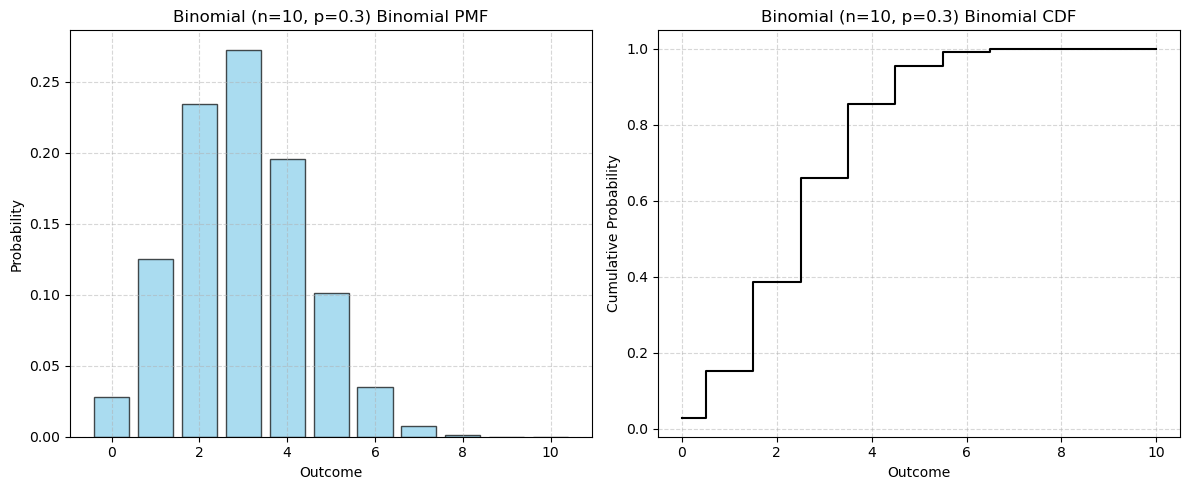

In [3]:
np.random.seed(42)
samples = generate_binomial_samples(n=10, p=0.3, n_samples=10000)
print(samples)
plot_binomial_samples(samples, n=10, title_prefix='Binomial (n=10, p=0.3)')